In [109]:
import matplotlib.pyplot as plt
import  numpy as np
import cv2 as cv
import pandas

Text(0.5, 1.0, 'avatar')

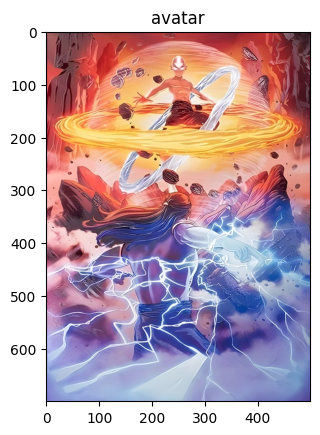

In [110]:
img = plt.imread('aang.jpg')
plt.imshow(img)
plt.title("avatar")

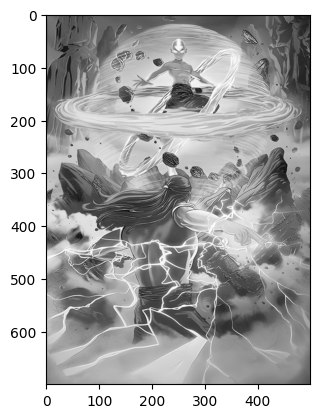

In [111]:
grayimg = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
grayimg2 = cv.cvtColor(grayimg, cv.COLOR_GRAY2RGB)
plt.imshow(grayimg2)

In [112]:
print(grayimg2)

[[[169 169 169]
  [123 123 123]
  [135 135 135]
  ...
  [ 19  19  19]
  [ 27  27  27]
  [ 16  16  16]]

 [[164 164 164]
  [115 115 115]
  [126 126 126]
  ...
  [ 28  28  28]
  [ 37  37  37]
  [ 23  23  23]]

 [[162 162 162]
  [110 110 110]
  [122 122 122]
  ...
  [ 33  33  33]
  [ 44  44  44]
  [ 26  26  26]]

 ...

 [[148 148 148]
  [131 131 131]
  [130 130 130]
  ...
  [ 83  83  83]
  [ 83  83  83]
  [ 84  84  84]]

 [[148 148 148]
  [131 131 131]
  [131 131 131]
  ...
  [ 83  83  83]
  [ 83  83  83]
  [ 83  83  83]]

 [[149 149 149]
  [133 133 133]
  [133 133 133]
  ...
  [ 82  82  82]
  [ 82  82  82]
  [ 82  82  82]]]


In [113]:
gratindex = [i for i in range(256)]
tinggi,lebar = grayimg.shape
jumlah = np.zeros(256).astype(int)
for i in range(tinggi):
    for j in range(lebar):
        nilaigray = grayimg[i, j]
        jumlah[nilaigray]+=1


<BarContainer object of 256 artists>

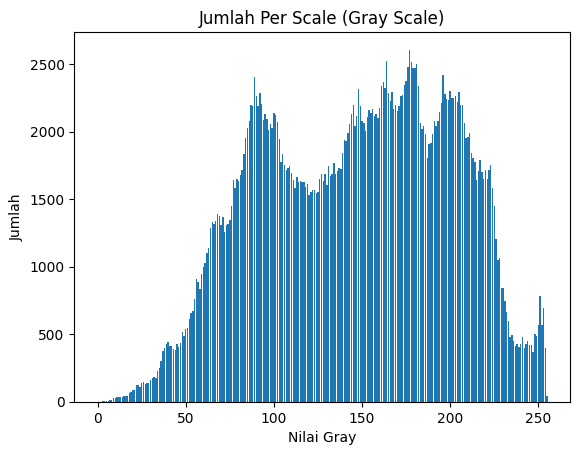

In [114]:
plt.title('Jumlah Per Scale (Gray Scale)')
plt.xlabel('Nilai Gray')
plt.ylabel('Jumlah')
plt.bar(gratindex,jumlah)

<BarContainer object of 256 artists>

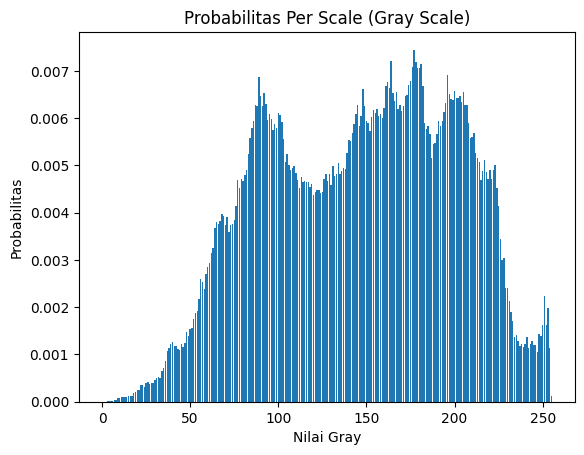

In [115]:
plt.title('Probabilitas Per Scale (Gray Scale)')
plt.xlabel('Nilai Gray')
plt.ylabel('Probabilitas')
plt.bar(gratindex,jumlah/jumlah.sum())

In [120]:
kernel = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]])
citrahasil=np.zeros((tinggi,lebar))
imagepadd = np.pad(grayimg,[(1,3),(1,3)])

In [123]:
for i in range(tinggi):
    for j in range(lebar):
        a=i+1
        b=j+1
        for k in range(1,3):
            for l in range(1,3):
                citrahasil[i][j] +=imagepadd[a+k][b+l]*kernel[k+1][l+1]
plt.imshow(citrahasil, cmap="gray")


IndexError: index 3 is out of bounds for axis 0 with size 3

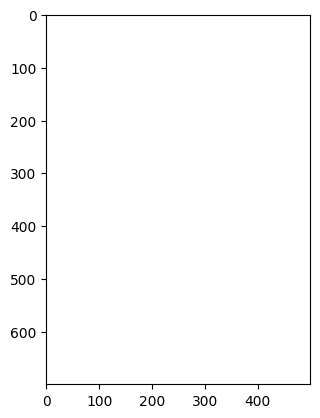

In [ ]:
for i in range(tinggi):
    for j in range(lebar):
        if(citrahasil[i][j]<0):
            citrahasil[i][j]=0
        if(citrahasil[i][j]>255):
            citrahasil[i][j]=255
plt.imshow(citrahasil, cmap="gray")

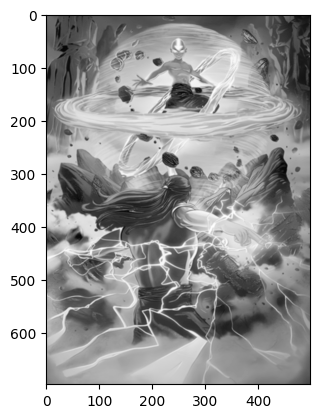

In [ ]:
citrahasiltanpapadd=np.zeros((tinggi-3,lebar-3))
for i in range(tinggi-3):
    for j in range(lebar-3):
        a=i+1
        b=j+1
        for k in range(-1,2):
            for l in range(-1,2):
                citrahasiltanpapadd[i][j] +=grayimg[a+k][b+l]*kernel[k+1][l+1]
plt.imshow(citrahasiltanpapadd, cmap="gray")

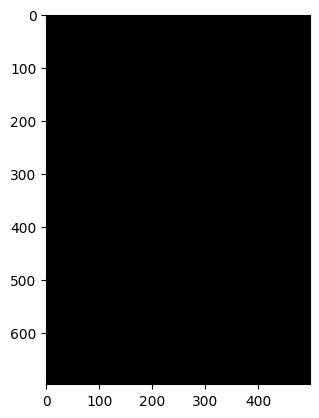

In [ ]:
for i in range(tinggi-3):
    for j in range(lebar-3):
        if(citrahasiltanpapadd[i][j]<0):
            citrahasiltanpapadd[i][j]=0
        if(citrahasiltanpapadd[i][j]>255):
            citrahasiltanpapadd[i][j]=255
plt.imshow(citrahasiltanpapadd, cmap="gray")